# Linear Regression<br>
## Problem Statement<br>
<b>By: Indrajit Kumar</b>


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 


# Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

<b>DataCarPrice_Assignment.csv</b>: Contains all the relevent specification about the cars in the US market and their pricing .



In [2]:
# %config IPCompleter.greedy=True
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [84]:
cardata = pd.read_csv('CarPrice_Assignment.csv')
# Check the head of the dataset
cardata.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [85]:
cardata.shape

(205, 26)

In [86]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [87]:
cardata.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

Now, Lets check for the missing values in dataframe

In [88]:
# percentage of missing values in each column
round(cardata.isnull().sum()/len(cardata.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

Its great to see that there is no data is missing.

In [89]:
# Dropping Duplicates if any
cardata=cardata.drop_duplicates()

In [90]:
cardata.shape

(205, 26)

In [91]:
# We can drop the car_Id as it is not relevent for price modeling
cardata.drop('car_ID', axis=1, inplace=True)

In [92]:
cardata.shape

(205, 25)

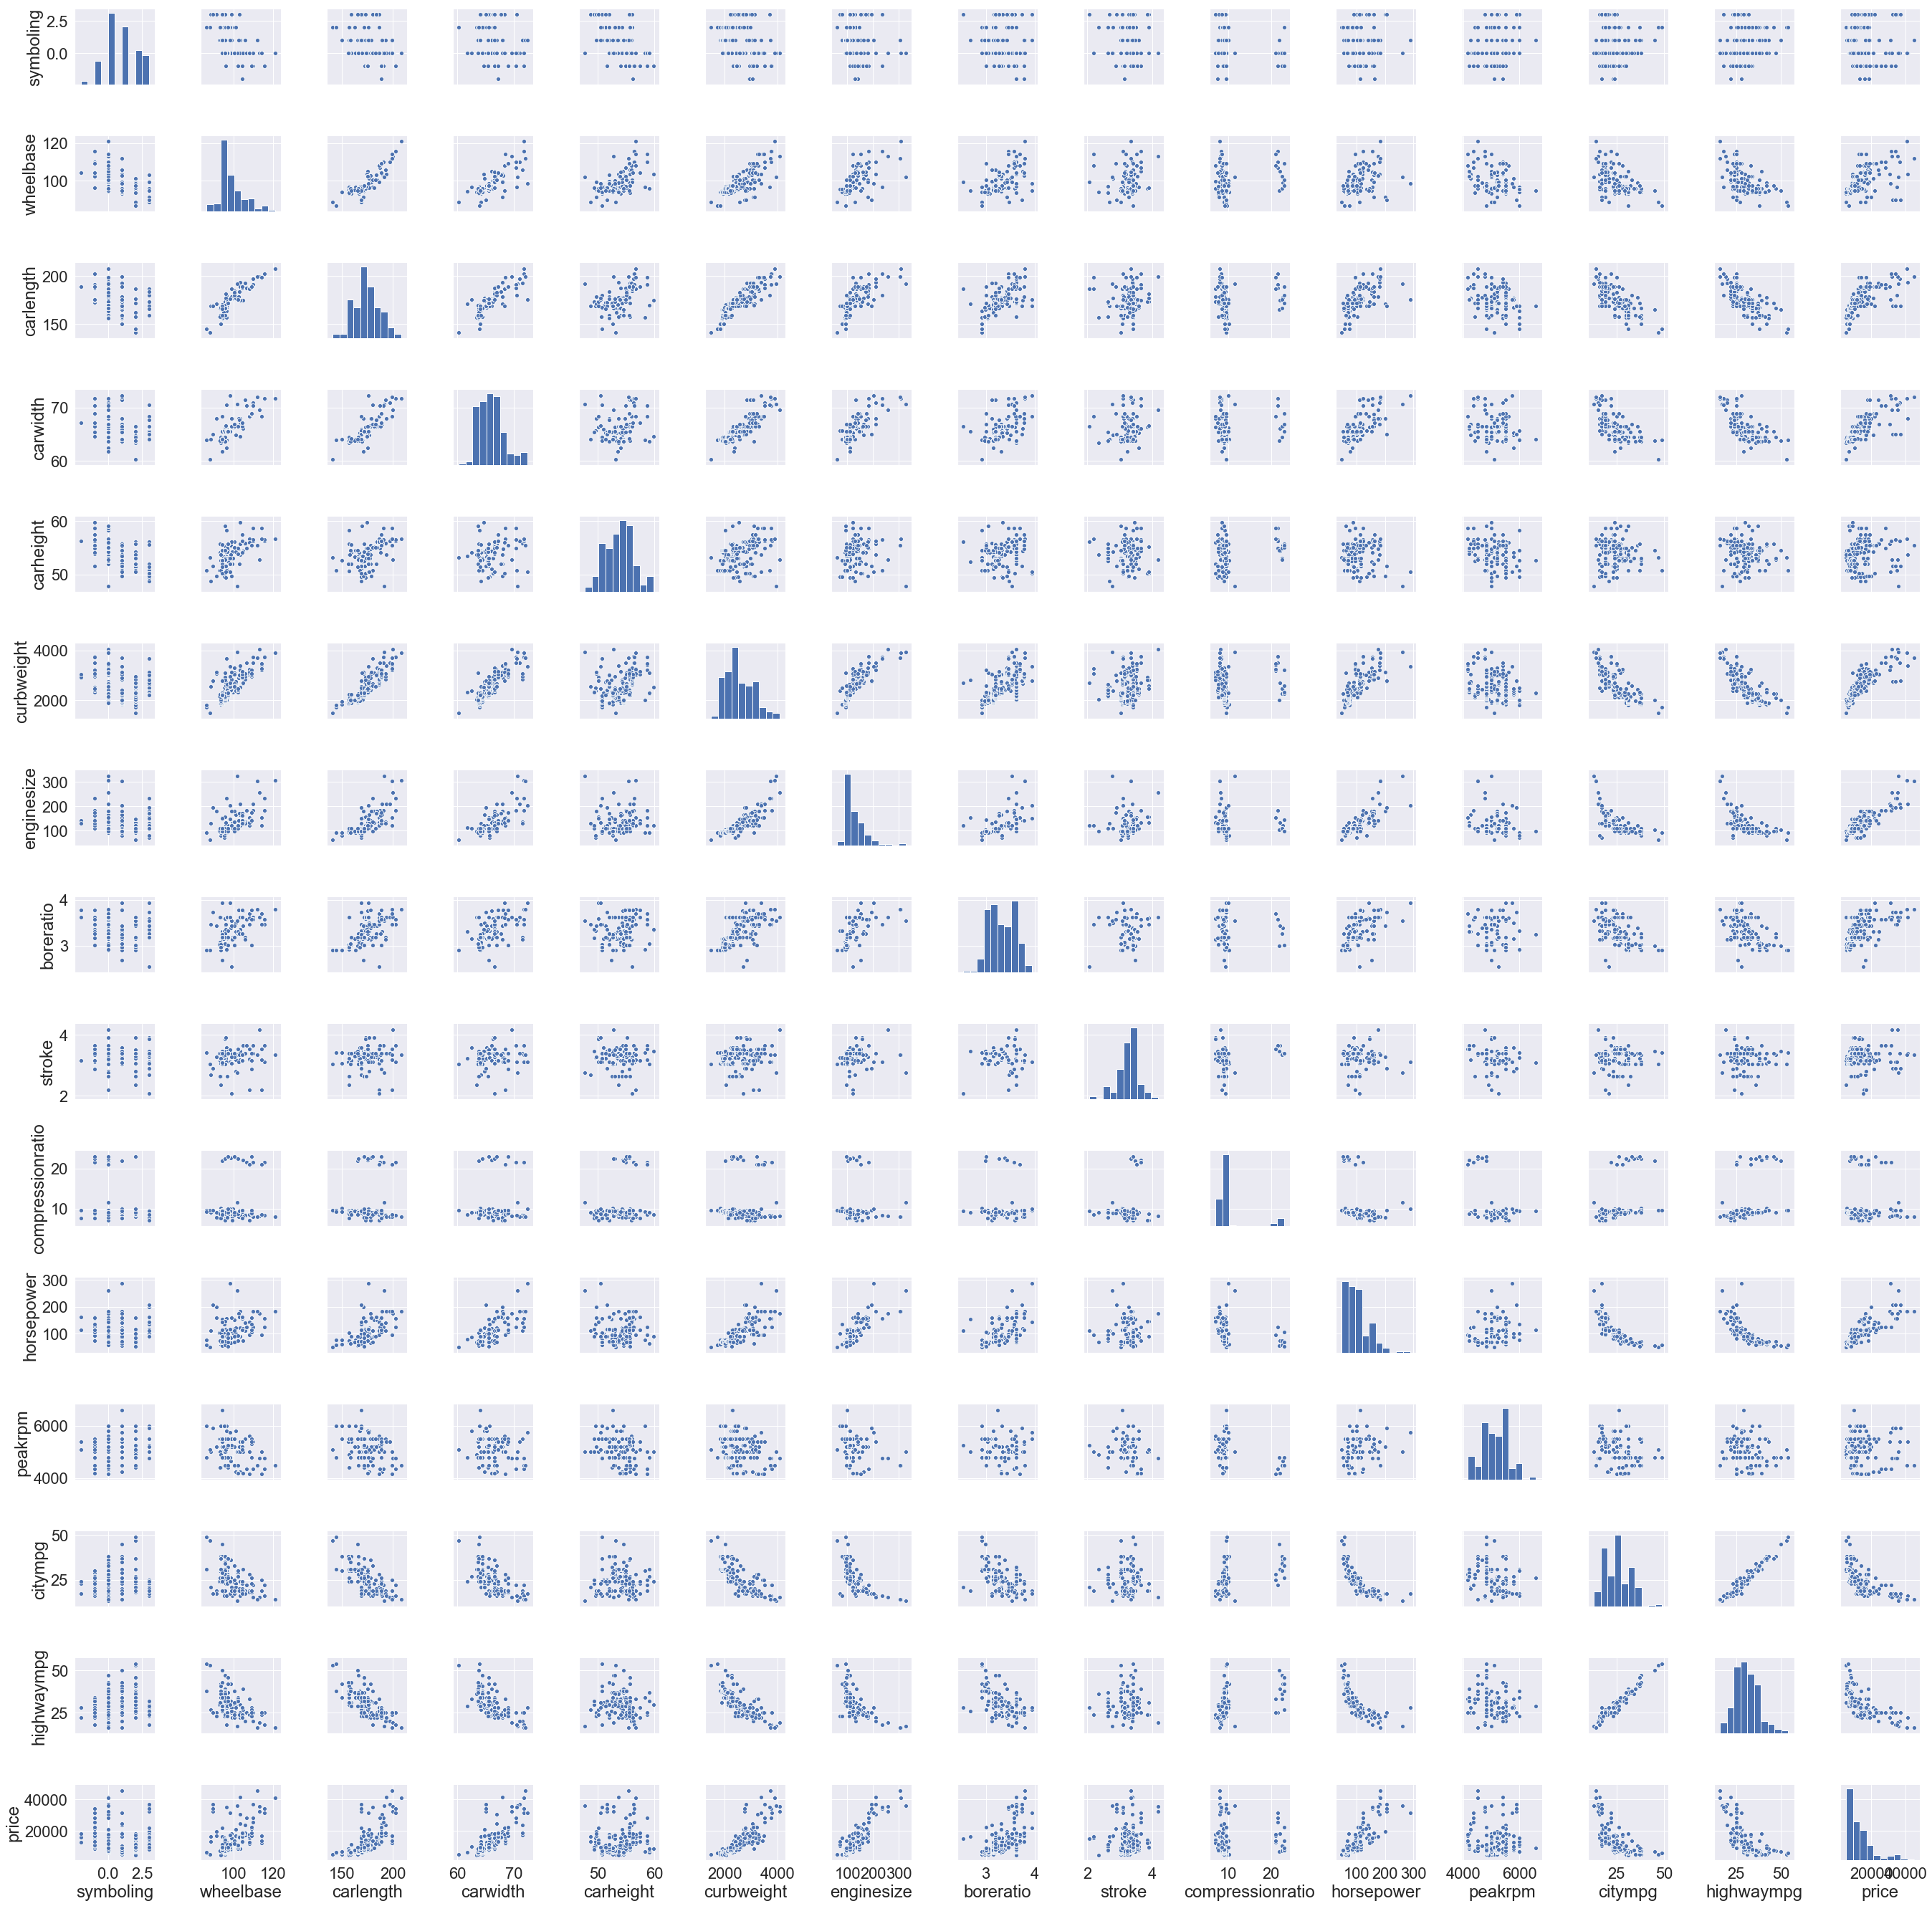

In [93]:
#Visualizing the Data
# Let's plot a pair plot of all variables in our dataframe
sns.set(font_scale=2)
sns.pairplot(cardata)

compressionratio is the only variable having different spikes, one at left another at right, we should inspect it more...

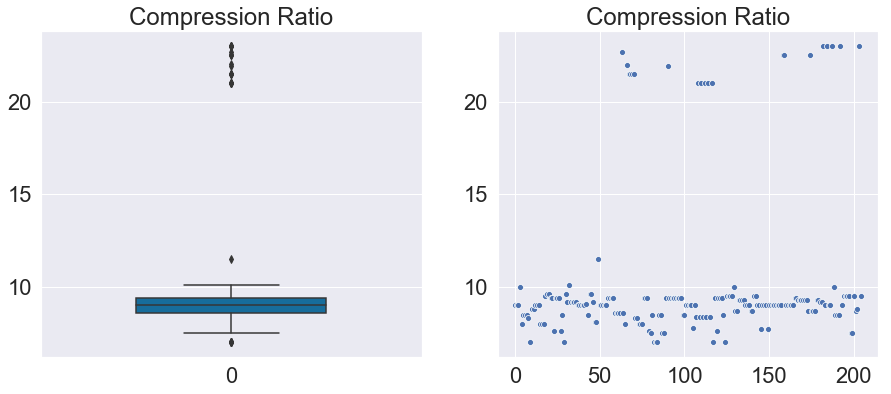

In [182]:
# searching for outliers in compressionratio

# Box-plot
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.boxplot(data=cardata.compressionratio, width=0.5, palette="colorblind")
plt.title('Compression Ratio')

# Scatter plot
plt.subplot(122)
sns.scatterplot(data=cardata.compressionratio, palette="colorblind")
plt.title('Compression Ratio')
plt.show()

So, majority of the values lies between 0-12, whereas few others lying arround 22, those seems to be outliers, lets check their percentage...

In [184]:
# percentage of outliers
comp_ratio = cardata[['compressionratio']].copy().sort_values(by='compressionratio',ascending=False)
comp_ratio_outlier = cardata[cardata['compressionratio']>12]
print(len(comp_ratio))
print(len(comp_ratio_outlier))

comp_ratio_outlier_perc = round(100*(len(comp_ratio_outlier) / len(comp_ratio)),2)
print('Outlier percentage of compressionratio: ' + str(comp_ratio_outlier_perc))

205
20
Outlier percentage of compressionratio: 9.76


So, the outlier percentage is around 10%, removing 20 rows out of 205 seems to be expensive, lets keep them for now, in future we may handle them.

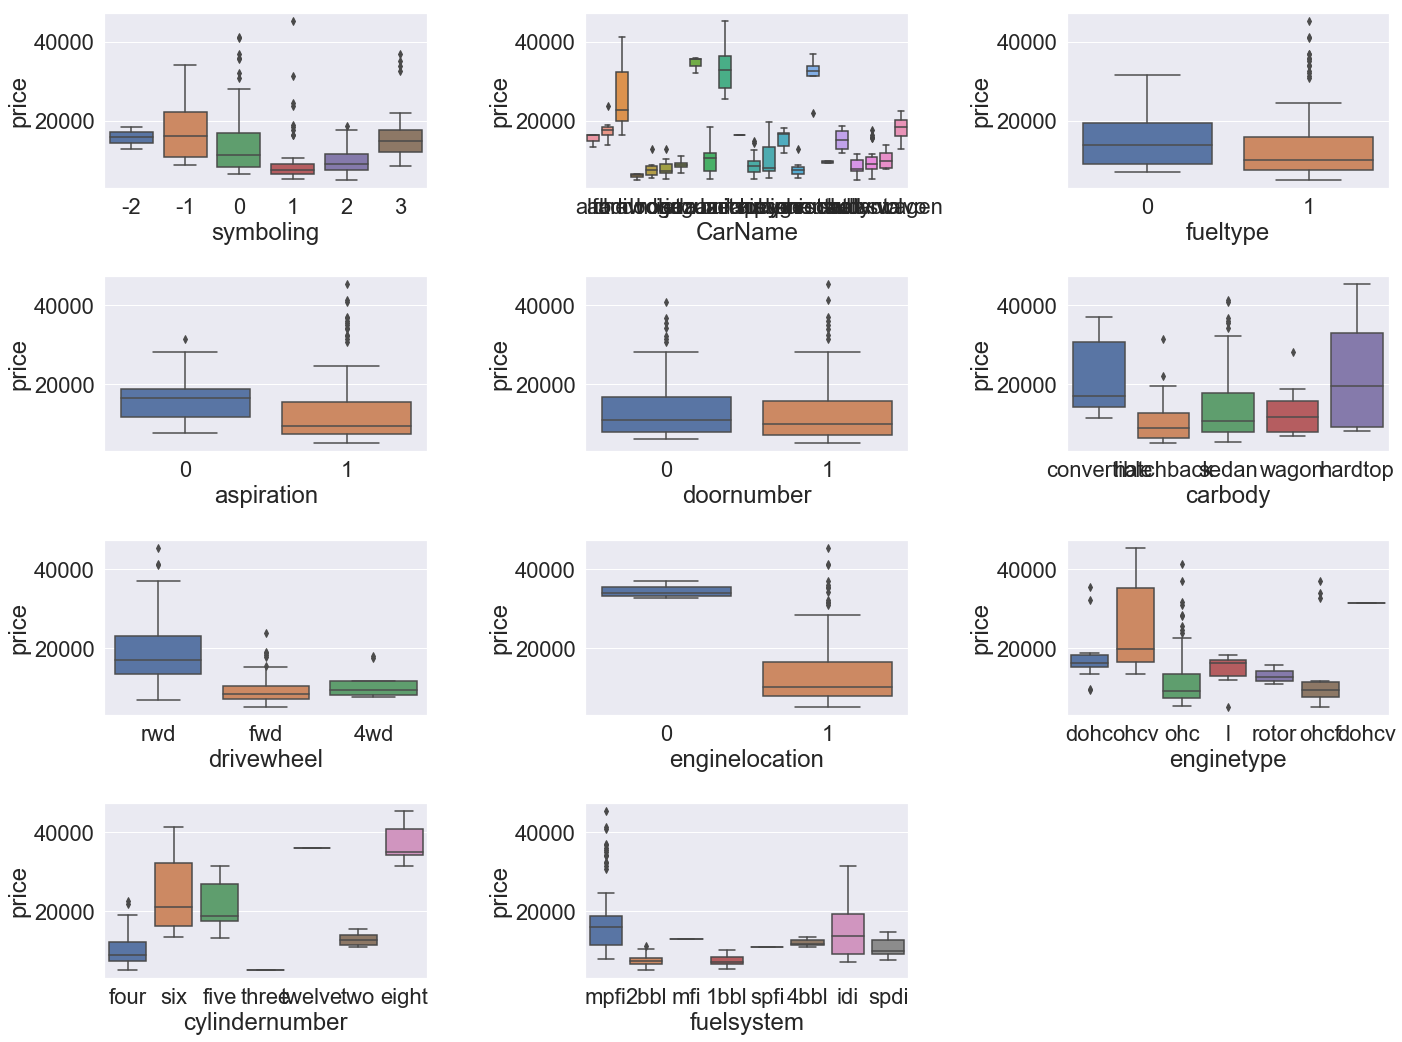

In [197]:
plt.figure(figsize=(20, 15))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = cardata)
plt.subplot(4,3,2)
sns.boxplot(x = 'CarName', y = 'price', data = cardata)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = cardata)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = cardata)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = cardata)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = cardata)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardata)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardata)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = cardata)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardata)
plt.subplot(4,3,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardata)
plt.tight_layout()
plt.show()

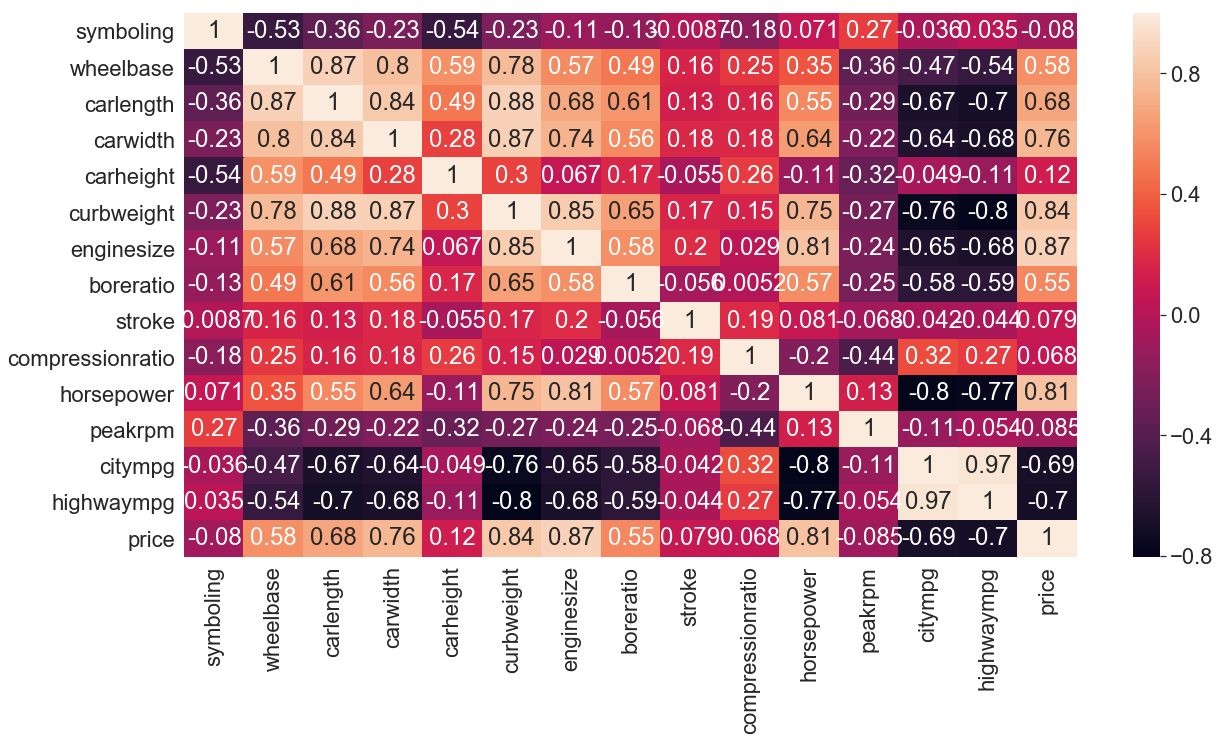

In [94]:
plt.figure(figsize = (20,10))  
sns.heatmap(cardata.corr(),annot = True)

From above scatter plots and also the heat map, as we can notice that there is a high corelation between: <br> <ol><li>carlength, curbweight, wheelbase and carwidth, so we can drop 3 out of 4, so lets drop carwidth and curbweight and wheelbase </li><li>There is a high corelation of .97 between highwaympg and citympg, so lets drop highwaympg</li></ol>

In [95]:
#Remove curbweight, wheelbase and carwidth and highwaympg from table
cardata.drop(['carwidth','curbweight','wheelbase','highwaympg'], axis =1, inplace = True)

In [96]:
cardata.shape

(205, 21)

### Dealing with Outliers

Let's visulise the outlier by using scatter plot

Text(0, 0.5, 'price')

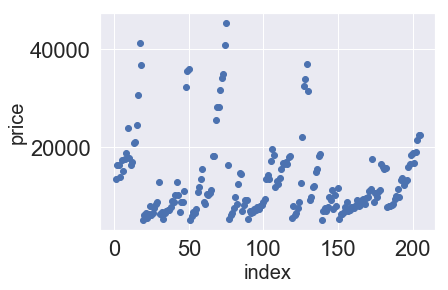

In [97]:
#Lets put count in x axies
count = [i for i in range(1,206,1)]

plt.scatter(count, cardata.price)
plt.xlabel('index', fontsize=20)
plt.ylabel('price', fontsize=20)

### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [98]:
cardata.shape

(205, 21)

In [99]:
cardata.CarName

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [100]:
cardata["CarName"] = cardata["CarName"].str.replace('-', ' ')
cardata.CarName

0                alfa romero giulia
1               alfa romero stelvio
2          alfa romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [101]:
cardata["CarName"] = cardata.CarName.map(lambda x: x.split(" ", 1)[0])
cardata.CarName

0            alfa
1            alfa
2            alfa
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
          ...    
175        toyota
176        toyota
177        toyota
178        toyota
179        toyota
180        toyota
181       toyouta
182     vokswagen
183    volkswagen
184    volkswagen
185    volkswagen
186    volkswagen
187    volkswagen
188    volkswagen
189            vw
190            vw
191    volkswagen
192    volkswagen
193    volkswagen
194         volvo
195         volvo
196         volvo
197         volvo
198         volvo
199       

In [102]:
#As we have seen redendent data in Car Names, Such as vokswagen, volkswagen, toyouta, toyota.
#Lets fix it first:

cardata.CarName = cardata.CarName.str.lower()
cardata.CarName = cardata.CarName.str.replace('vokswagen','volkswagen')
cardata.CarName = cardata.CarName.str.replace('vw','volkswagen')
cardata.CarName = cardata.CarName.str.replace('toyouta','toyota')
cardata.CarName = cardata.CarName.str.replace('porcshce','porsche')
cardata.CarName = cardata.CarName.str.replace('maxda','mazda')
cardata.CarName.unique()


array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

Now, we achived all unique CarNames. <br>


Let's now deal with Categorical variables from other fields

In [126]:
#Convert fueltype	aspiration	doornumber	enginelocation in binary 1 for one and 0 for anaother.
cardata['fueltype'] = cardata['fueltype'].map({'gas':1, 'diesel':0})
cardata['aspiration'] = cardata['aspiration'].map({'std': 1, 'turbo': 0})
cardata['doornumber'] = cardata['doornumber'].map({'two': 1, 'four': 0})
cardata['enginelocation'] = cardata['enginelocation'].map({'front': 1, 'rear': 0})

In [127]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
carlength           205 non-null float64
carheight           205 non-null float64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
price               205 non-null float64
dtypes: float64(6), int64(9), object(6)
memory usage: 45.2

In [128]:
cardata.head()

symboling CarName  fueltype  aspiration  doornumber      carbody  \
0          3    alfa         1           1           1  convertible   
1          3    alfa         1           1           1  convertible   
2          1    alfa         1           1           1    hatchback   
3          2    audi         1           1           0        sedan   
4          2    audi         1           1           0        sedan   

  drivewheel  enginelocation  carlength  carheight  ... cylindernumber  \
0        rwd               1      168.8       48.8  ...           four   
1        rwd               1      168.8       48.8  ...           four   
2        rwd               1      171.2       52.4  ...            six   
3        fwd               1      176.6       54.3  ...           four   
4        4wd               1      176.6       54.3  ...           five   

  enginesize  fuelsystem boreratio  stroke  compressionratio  horsepower  \
0        130        mpfi      3.47    2.68               9.0         111   
1        130        mpfi      3.47    2.68               9.0         111   
2        152        mpfi      2.68    3.47               9.0         154   
3        109        mpfi      3.19    3.40              10.0         102   
4        136        mpfi      3.19    3.40               8.0         115   

   peakrpm  citympg    price  
0     5000       21  13495.0  
1     5000       21  16500.0  
2     5000       19  16500.0  
3     5500       24  13950.0  
4     5500       18  17450.0  

[5 rows x 21 columns]

Now, Its time for rescaling some for variable/features by using normailization.

Generating dummy values for categorical columns of more than 2 levels<br>
As we can se we have few categorial fields like carName, carbody, driveWheel, fuelsystem, cylinderNumber, engineType So lets generate dummy columns for all of these first.

In [129]:
df = pd.get_dummies(cardata)
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0          3         1           1           1               1      168.8   
1          3         1           1           1               1      168.8   
2          1         1           1           1               1      171.2   
3          2         1           1           0               1      176.6   
4          2         1           1           0               1      176.6   

   carheight  enginesize  boreratio  stroke  ...  cylindernumber_twelve  \
0       48.8         130       3.47    2.68  ...                      0   
1       48.8         130       3.47    2.68  ...                      0   
2       52.4         152       2.68    3.47  ...                      0   
3       54.3         109       3.19    3.40  ...                      0   
4       54.3         136       3.19    3.40  ...                      0   

   cylindernumber_two  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 67 columns]

In [130]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_

In [131]:
#defining a normalisation function 
cols_to_normalise= ['symboling', 'carlength', 'carheight', 
         'enginesize', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'price']

In [132]:
#First lets normalise only numerics fields
#This we can achive by using min_max function from sklearn also, as both are same lets do manual for unerstanding
normalised_df = df[cols_to_normalise].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
normalised_df.head()

symboling  carlength  carheight  enginesize  boreratio    stroke  \
0   0.433171  -0.078347  -0.410407    0.011671   0.100174 -0.274007   
1   0.433171  -0.078347  -0.410407    0.011671   0.100174 -0.274007   
2   0.033171  -0.042526  -0.110407    0.094689  -0.464111  0.102184   
3   0.233171   0.038071   0.047927   -0.067575  -0.099826  0.068850   
4   0.233171   0.038071   0.047927    0.034312  -0.099826  0.068850   

   compressionratio  horsepower   peakrpm   citympg     price  
0         -0.071409    0.028679 -0.051070 -0.117209  0.005419  
1         -0.071409    0.028679 -0.051070 -0.117209  0.080018  
2         -0.071409    0.207846 -0.051070 -0.172764  0.080018  
3         -0.008909   -0.008821  0.153011 -0.033875  0.016714  
4         -0.133909    0.045346  0.153011 -0.200542  0.103602

In [133]:
df['symboling'] = normalised_df['symboling']
df['carlength'] = normalised_df['carlength']
df['carheight'] = normalised_df['carheight']
df['enginesize'] = normalised_df['enginesize']
df['boreratio'] = normalised_df['boreratio']
df['stroke'] = normalised_df['stroke']
df['price'] = normalised_df['price']
df['compressionratio'] = normalised_df['compressionratio']
df['horsepower'] = normalised_df['horsepower']
df['peakrpm']= normalised_df['peakrpm']
df['citympg'] = normalised_df['citympg']
df.head()

symboling  fueltype  aspiration  doornumber  enginelocation  carlength  \
0   0.433171         1           1           1               1  -0.078347   
1   0.433171         1           1           1               1  -0.078347   
2   0.033171         1           1           1               1  -0.042526   
3   0.233171         1           1           0               1   0.038071   
4   0.233171         1           1           0               1   0.038071   

   carheight  enginesize  boreratio    stroke  ...  cylindernumber_twelve  \
0  -0.410407    0.011671   0.100174 -0.274007  ...                      0   
1  -0.410407    0.011671   0.100174 -0.274007  ...                      0   
2  -0.110407    0.094689  -0.464111  0.102184  ...                      0   
3   0.047927   -0.067575  -0.099826  0.068850  ...                      0   
4   0.047927    0.034312  -0.099826  0.068850  ...                      0   

   cylindernumber_two  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
0                   0                0                0                0   
1                   0                0                0                0   
2                   0                0                0                0   
3                   0                0                0                0   
4                   0                0                0                0   

   fuelsystem_idi  fuelsystem_mfi  fuelsystem_mpfi  fuelsystem_spdi  \
0               0               0                1                0   
1               0               0                1                0   
2               0               0                1                0   
3               0               0                1                0   
4               0               0                1                0   

   fuelsystem_spfi  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 67 columns]

# Splitting Data into Training and Testing Sets

Lets put feature veriable to X
and put price variable to y

In [134]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_

In [135]:
#Putting X veriables
X= df[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carlength', 'carheight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]

#Putting response veriable to y
y=df['price']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [137]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)          
print(rfe.ranking_)

[False False False False False  True False  True  True  True False False
 False False False  True  True  True False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False  True False False
 False False  True  True False  True False  True  True  True False False
 False False False False False False]
[49 38  5 24 47  1 16  1  1  1 43 32  4 50 15  1  1  1 22 17 27 29 18 39
 46  6 31  2 14  1 30 10 40 48 33 11  9 36 35 34 37 45 44 25  8  1  3 13
 21  7  1  1 12  1 23  1  1  1 19 28 42 26 51 41 20 52]


Will call the rfe() which implements the <b>recursive feature elimination</b>.

Apart from the x and y datasets, RFE also takes two important parameters.

<li>sizes</li>
<li>rfeControl</li>
The sizes determines what all model sizes (the number of most important features) the rfe should consider. In above case, it iterates models of size 1 to 5, 10, 15 and 18.

In [138]:
X_train.columns[rfe.support_]

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [139]:
#variables that are to be dropped
X_train.columns
col = X_train.columns[~rfe.support_]
col

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'CarName_alfa', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_s

In [140]:
len(X_train.columns)

66

In [141]:
X_train1 = X_train.drop(col,1)
df  = X_train1

In [142]:
X_train1.columns


Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'CarName_audi',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [143]:
X_train1.head()

carlength  enginesize  boreratio    stroke  CarName_audi  CarName_bmw  \
122  -0.100735   -0.109084  -0.256969 -0.012102             0            0   
125  -0.076855    0.090916   0.435889 -0.069245             0            0   
166  -0.079840   -0.109084  -0.064111 -0.083531             0            0   
1    -0.078347    0.011671   0.100174 -0.274007             0            0   
199   0.220160    0.011671   0.207317 -0.050197             0            0   

     CarName_buick  CarName_porsche  enginetype_dohcv  enginetype_rotor  \
122              0                0                 0                 0   
125              0                1                 0                 0   
166              0                0                 0                 0   
1                0                0                 0                 0   
199              0                0                 0                 0   

     cylindernumber_eight  cylindernumber_four  cylindernumber_three  \
122                     0                    1                     0   
125                     0                    1                     0   
166                     0                    1                     0   
1                       0                    1                     0   
199                     0                    1                     0   

     cylindernumber_twelve  cylindernumber_two  
122                      0                   0  
125                      0                   0  
166                      0                   0  
1                        0                   0  
199                      0                   0

Now build <b>Model-1</b> after removing or droping columns by RFE (Recursive feature eliminator)

In [144]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train1 = sm.add_constant(X_train1)

# Running the linear model
lm_1 = sm.OLS(y_train,X_train1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.94e-61
Time:                        22:27:53   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [145]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [146]:
#Check for VIF
getVIF(df)

Features   VIF
9        enginetype_rotor   inf
14     cylindernumber_two   inf
1              enginesize  6.97
0               carlength  3.38
10   cylindernumber_eight  3.13
2               boreratio  2.93
8        enginetype_dohcv  2.51
13  cylindernumber_twelve  2.12
7         CarName_porsche  1.91
6           CarName_buick  1.86
3                  stroke  1.80
11    cylindernumber_four  1.47
5             CarName_bmw  1.24
4            CarName_audi  1.13
12   cylindernumber_three  1.07

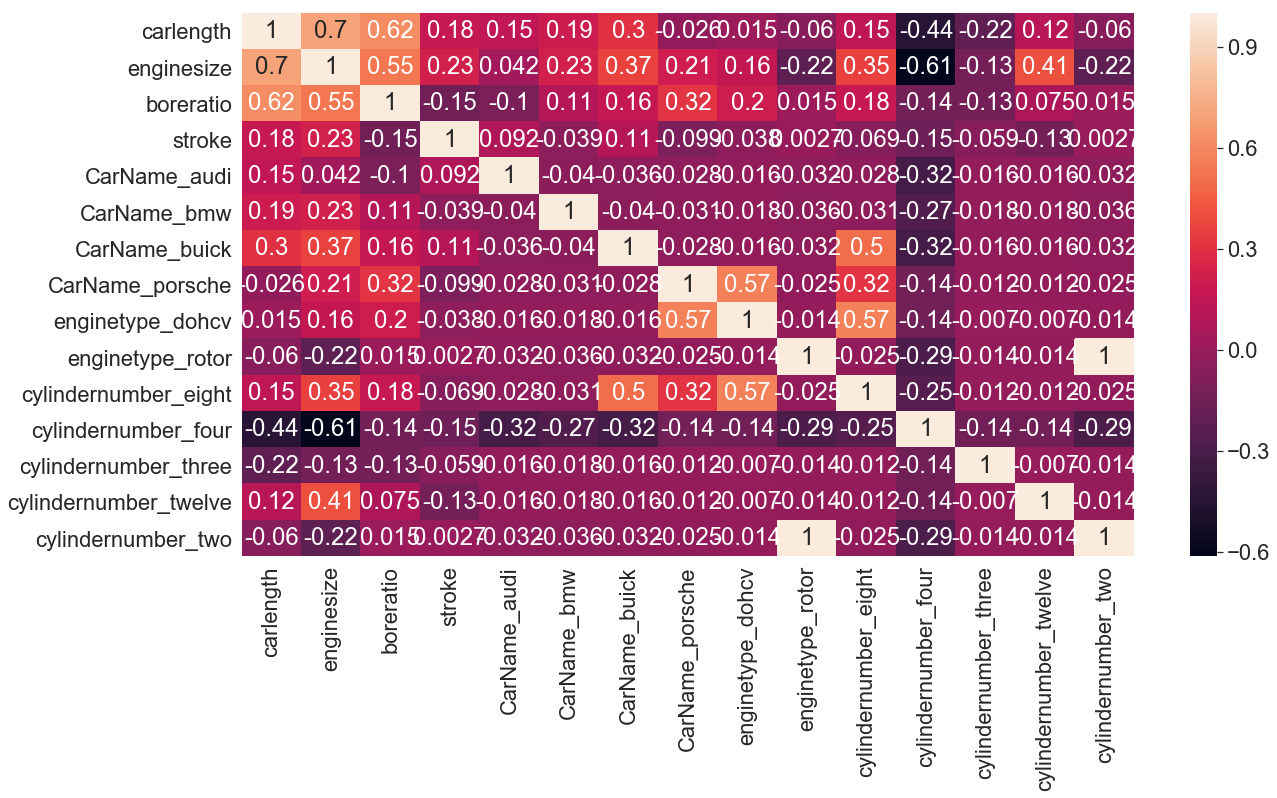

In [147]:
#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

Lets drop <b>enginetype_rotor and cylindernumber_two </b> the Vif value is pretty high and infinity because they are highly correlated with each other having Pearson Correlation factor(R) nearly equal to 1. we can see it by the heatmap also
So, we should drop one of the inf feature..

<b>Model-2</b>

In [148]:
# Dropping highly correlated variables and insignificant variables
X_train2 = X_train1.drop('enginetype_rotor', 1)

In [149]:
# Creating a second fitted model
lm_2 = sm.OLS(y_train,X_train2).fit()

#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           8.94e-61
Time:                        22:27:56   Log-Likelihood:                 206.99
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     128   BIC:                            -339.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [150]:
# Lets drop enginetype_rotor and check for VIF
df.drop('enginetype_rotor', axis =1, inplace = True)
getVIF(df)


Features   VIF
1              enginesize  6.97
0               carlength  3.38
9    cylindernumber_eight  3.13
2               boreratio  2.93
8        enginetype_dohcv  2.51
12  cylindernumber_twelve  2.12
7         CarName_porsche  1.91
6           CarName_buick  1.86
3                  stroke  1.80
10    cylindernumber_four  1.47
13     cylindernumber_two  1.30
5             CarName_bmw  1.24
4            CarName_audi  1.13
11   cylindernumber_three  1.07

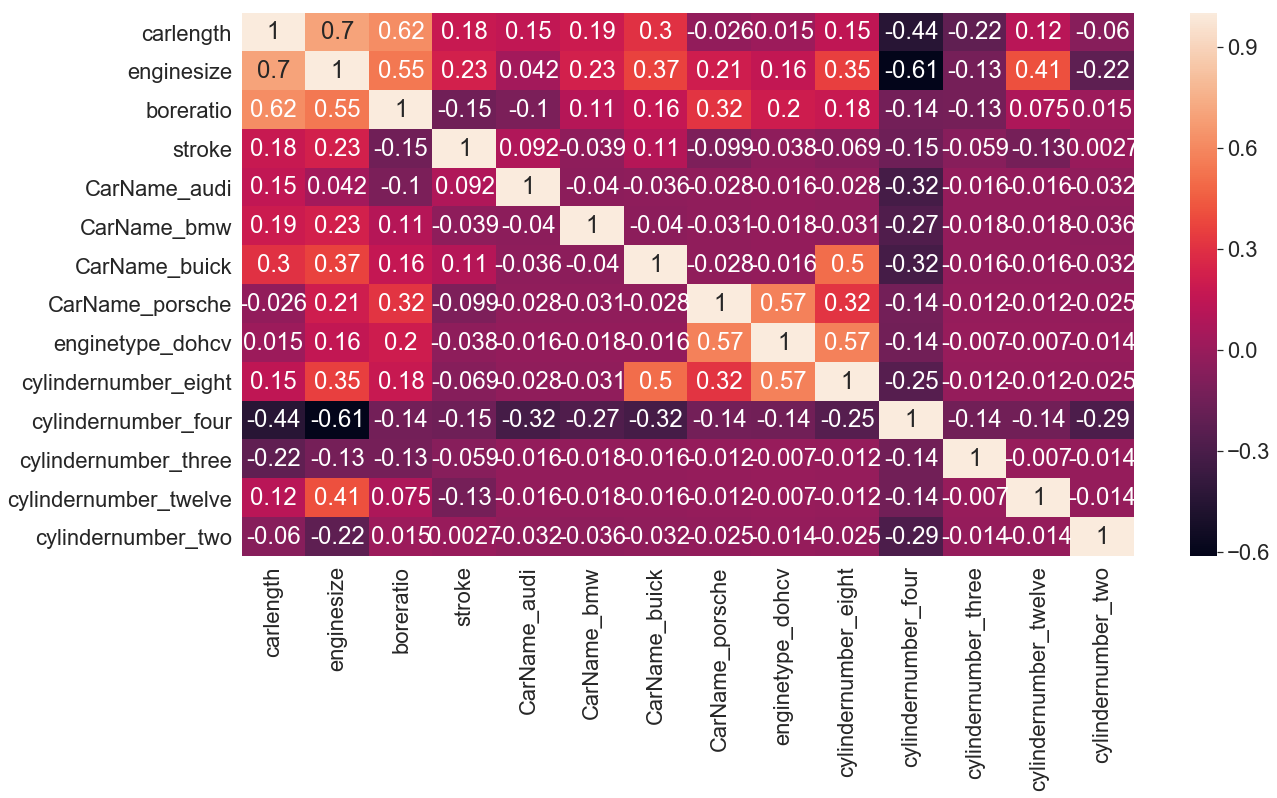

In [151]:
#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

As we can see that it is positively corelated with enginetype_dohcv(0.064) lets go ahead and drop it.

<b>Model-3</b>

In [152]:
# Dropping highly correlated variables and insignificant variables
X_train3 = X_train2.drop('enginetype_dohcv', 1)
# Creating a third fitted model
lm_3 = sm.OLS(y_train,X_train3).fit()

#Let's see the summary of our third linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.78e-61
Time:                        22:27:59   Log-Likelihood:                 205.07
No. Observations:                 143   AIC:                            -382.1
Df Residuals:                     129   BIC:                            -340.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

In [153]:
# Lets drop enginetype_dohcv and check for VIF
df.drop('enginetype_dohcv', axis =1, inplace = True)
getVIF(df)


Features   VIF
1              enginesize  6.60
0               carlength  3.36
2               boreratio  2.86
11  cylindernumber_twelve  2.06
8    cylindernumber_eight  1.88
3                  stroke  1.70
6           CarName_buick  1.63
7         CarName_porsche  1.52
9     cylindernumber_four  1.45
12     cylindernumber_two  1.28
5             CarName_bmw  1.23
4            CarName_audi  1.13
10   cylindernumber_three  1.07

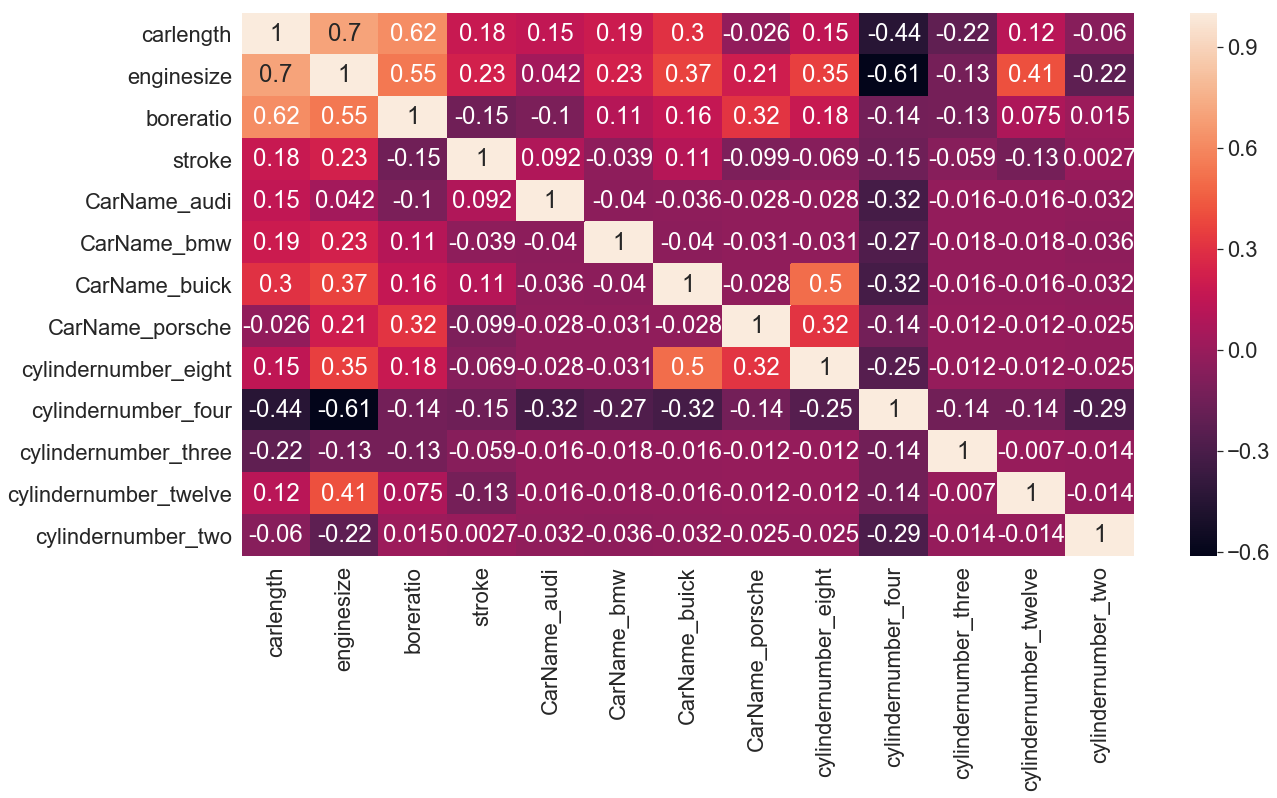

In [154]:
#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

As we can see that it is positively corelated with cylindernumber_eight(0.068) lets go ahead and drop it.

<b>Model-4</b>

In [155]:
# Dropping highly correlated variables and insignificant variables
X_train4 = X_train3.drop('cylindernumber_eight', 1)
# Creating a fourth fitted model
lm_4 = sm.OLS(y_train,X_train4).fit()

#Let's see the summary of our fourth linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.37e-61
Time:                        22:28:00   Log-Likelihood:                 203.21
No. Observations:                 143   AIC:                            -380.4
Df Residuals:                     130   BIC:                            -341.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

In [156]:
#Lets drop cylindernumber_eight and check for VIF
df.drop('cylindernumber_eight', axis =1, inplace = True)
getVIF(df)

Features   VIF
1              enginesize  5.76
0               carlength  3.33
2               boreratio  2.75
10  cylindernumber_twelve  1.91
3                  stroke  1.56
7         CarName_porsche  1.41
8     cylindernumber_four  1.41
6           CarName_buick  1.36
11     cylindernumber_two  1.25
5             CarName_bmw  1.20
4            CarName_audi  1.13
9    cylindernumber_three  1.07

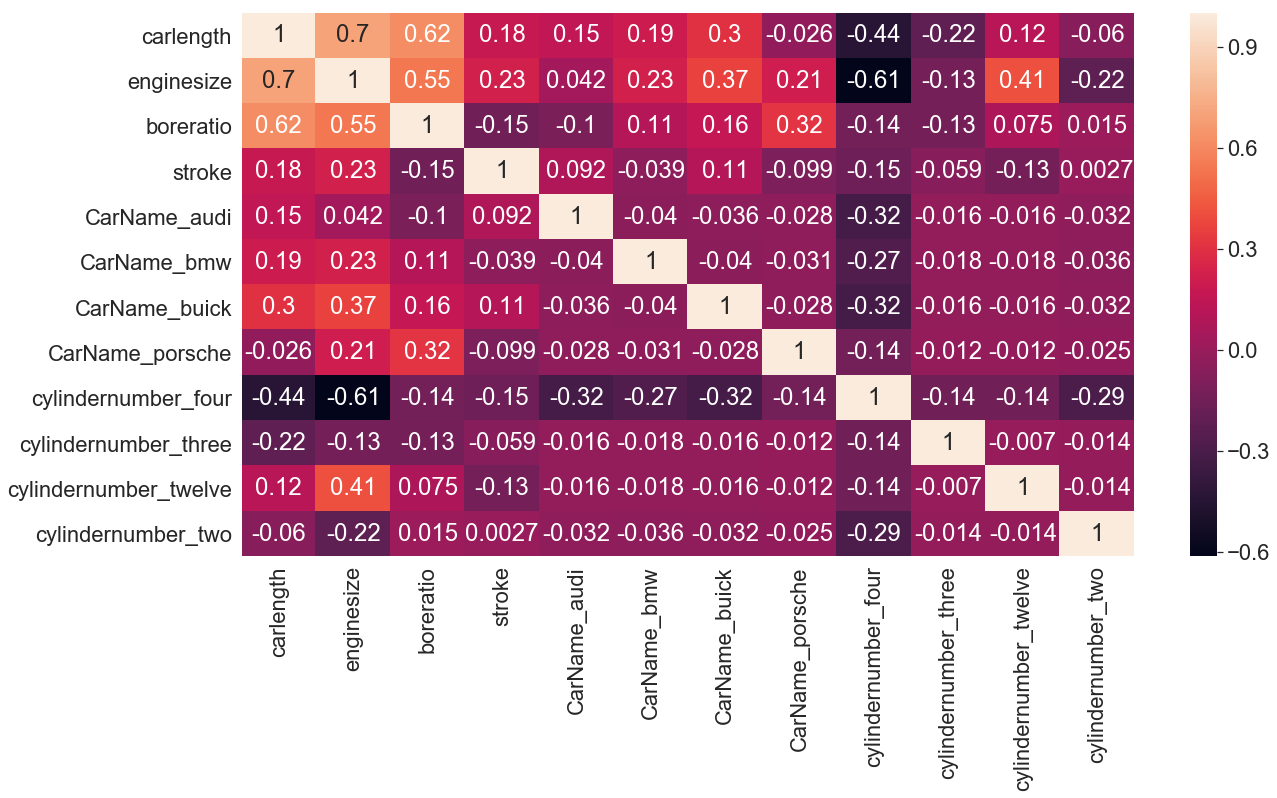

In [157]:

#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)


enginesize is having the highest VIF. Let's remove this.

<b>Model-5</b>

In [158]:
# Dropping highly correlated variables and insignificant variables
X_train5 = X_train4.drop('enginesize', 1)
# Creating a fifth fitted model
lm_5 = sm.OLS(y_train,X_train5).fit()

#Let's see the summary of our fifth linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     72.04
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.86e-50
Time:                        22:28:02   Log-Likelihood:                 171.87
No. Observations:                 143   AIC:                            -319.7
Df Residuals:                     131   BIC:                            -284.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.10

In [159]:
#Lets drop enginesize and check for VIF
df.drop('enginesize', axis =1, inplace = True)
getVIF(df)

Features   VIF
0               carlength  2.76
1               boreratio  2.45
6         CarName_porsche  1.24
2                  stroke  1.22
3            CarName_audi  1.13
5           CarName_buick  1.12
7     cylindernumber_four  1.11
8    cylindernumber_three  1.07
4             CarName_bmw  1.06
9   cylindernumber_twelve  1.05
10     cylindernumber_two  1.01

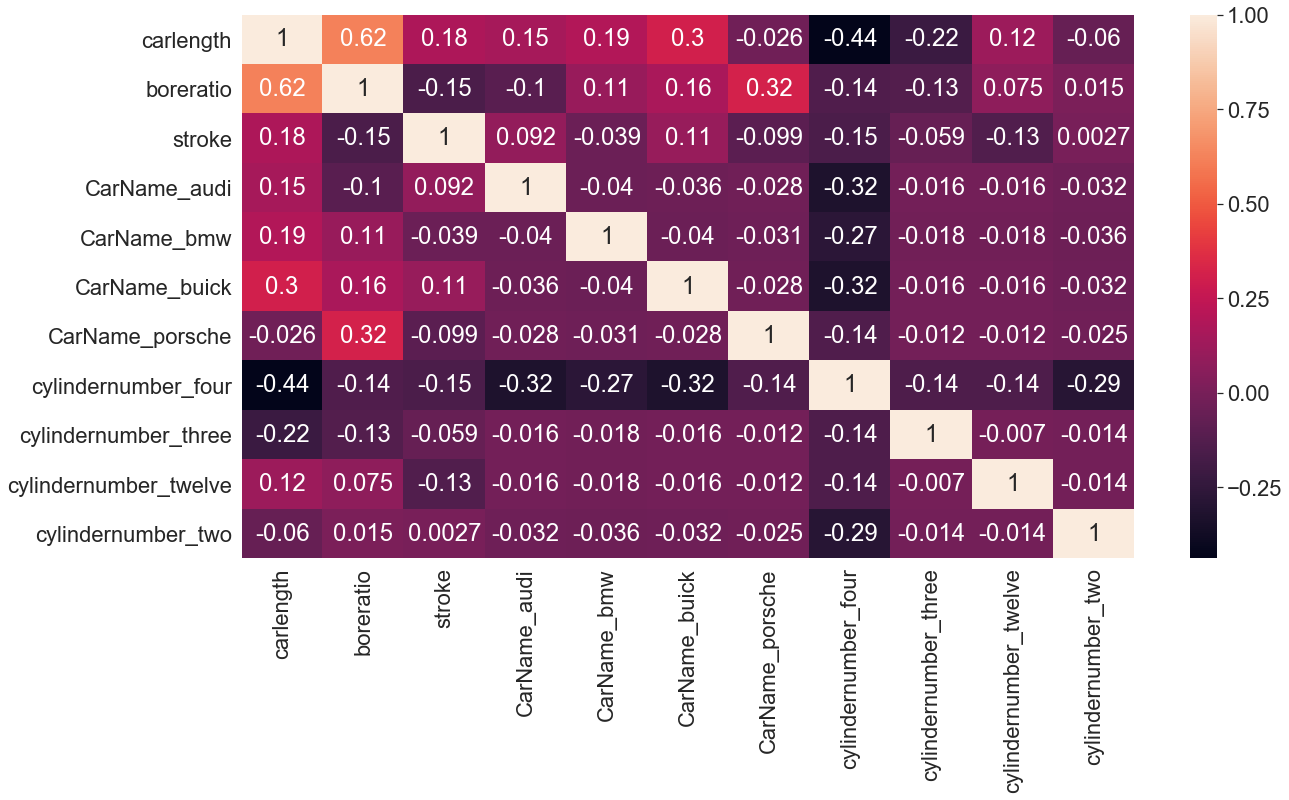

In [160]:
#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

CarName_audi having high p-value. So lets drop this as well

<b>Model-6</b>

In [161]:
# Dropping highly correlated variables and insignificant variables
X_train6 = X_train5.drop('CarName_audi', 1)
# Creating a sixth fitted model
lm_6 = sm.OLS(y_train,X_train6).fit()

#Let's see the summary of our sixth linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     79.83
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.36e-51
Time:                        22:28:03   Log-Likelihood:                 171.86
No. Observations:                 143   AIC:                            -321.7
Df Residuals:                     132   BIC:                            -289.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

In [162]:
#Lets drop CarName_audi as well and check for VIF
df.drop('CarName_audi', axis =1, inplace = True)
getVIF(df)

Features   VIF
0              carlength  2.49
1              boreratio  2.24
2                 stroke  1.22
5        CarName_porsche  1.21
4          CarName_buick  1.12
6    cylindernumber_four  1.11
7   cylindernumber_three  1.07
3            CarName_bmw  1.06
8  cylindernumber_twelve  1.05
9     cylindernumber_two  1.01

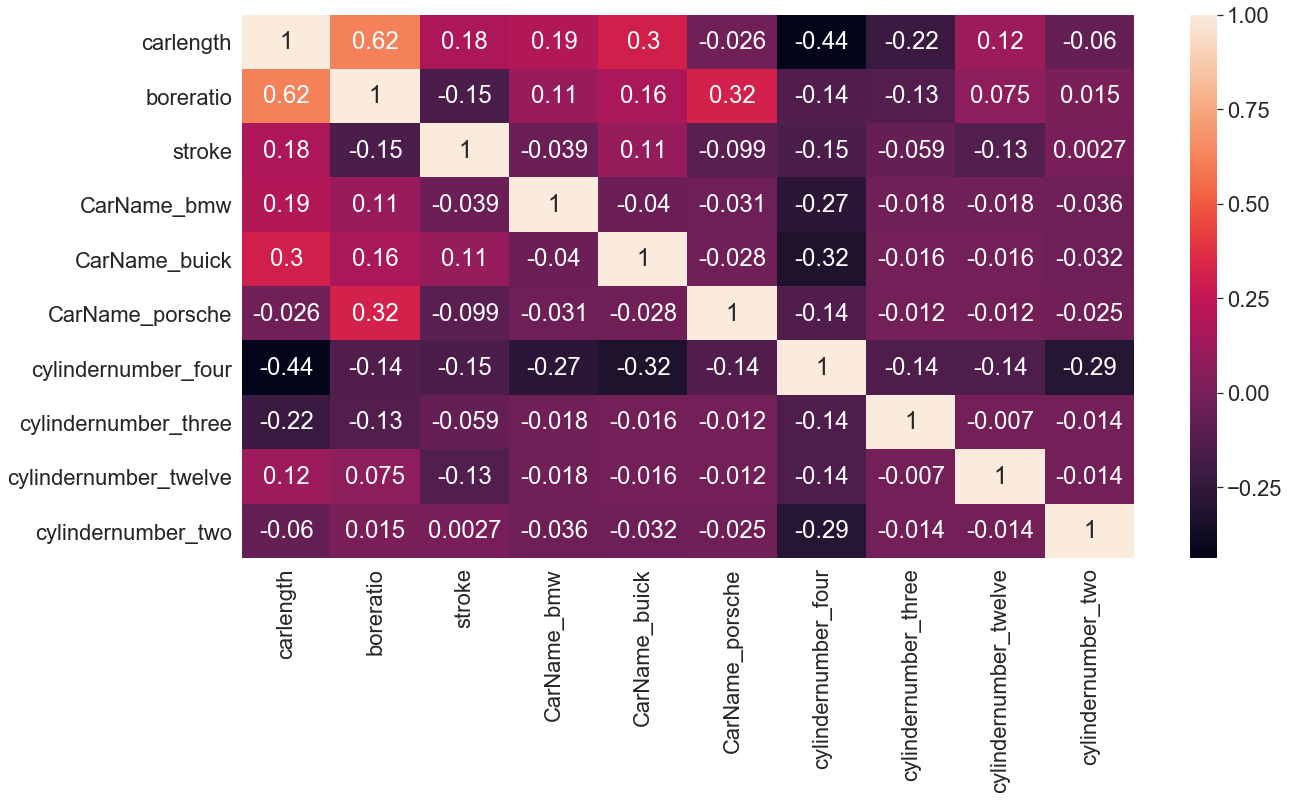

In [163]:
#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

cylindernumber_three also having high p-value. Drop this as well

<b>Model-7</b>

In [164]:
# Dropping highly correlated variables and insignificant variables
X_train7 = X_train6.drop('cylindernumber_three', 1)
# Creating a seventh fitted model
lm_7 = sm.OLS(y_train,X_train7).fit()

#Let's see the seventh of our second linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     88.60
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           9.01e-52
Time:                        22:28:04   Log-Likelihood:                 171.32
No. Observations:                 143   AIC:                            -322.6
Df Residuals:                     133   BIC:                            -293.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.09

In [165]:
# Lets drop cylindernumber_three and check for VIF
df.drop('cylindernumber_three', axis =1, inplace = True)
getVIF(df)

Features   VIF
0              carlength  2.41
1              boreratio  2.24
2                 stroke  1.22
5        CarName_porsche  1.21
4          CarName_buick  1.11
6    cylindernumber_four  1.10
3            CarName_bmw  1.06
7  cylindernumber_twelve  1.05
8     cylindernumber_two  1.01

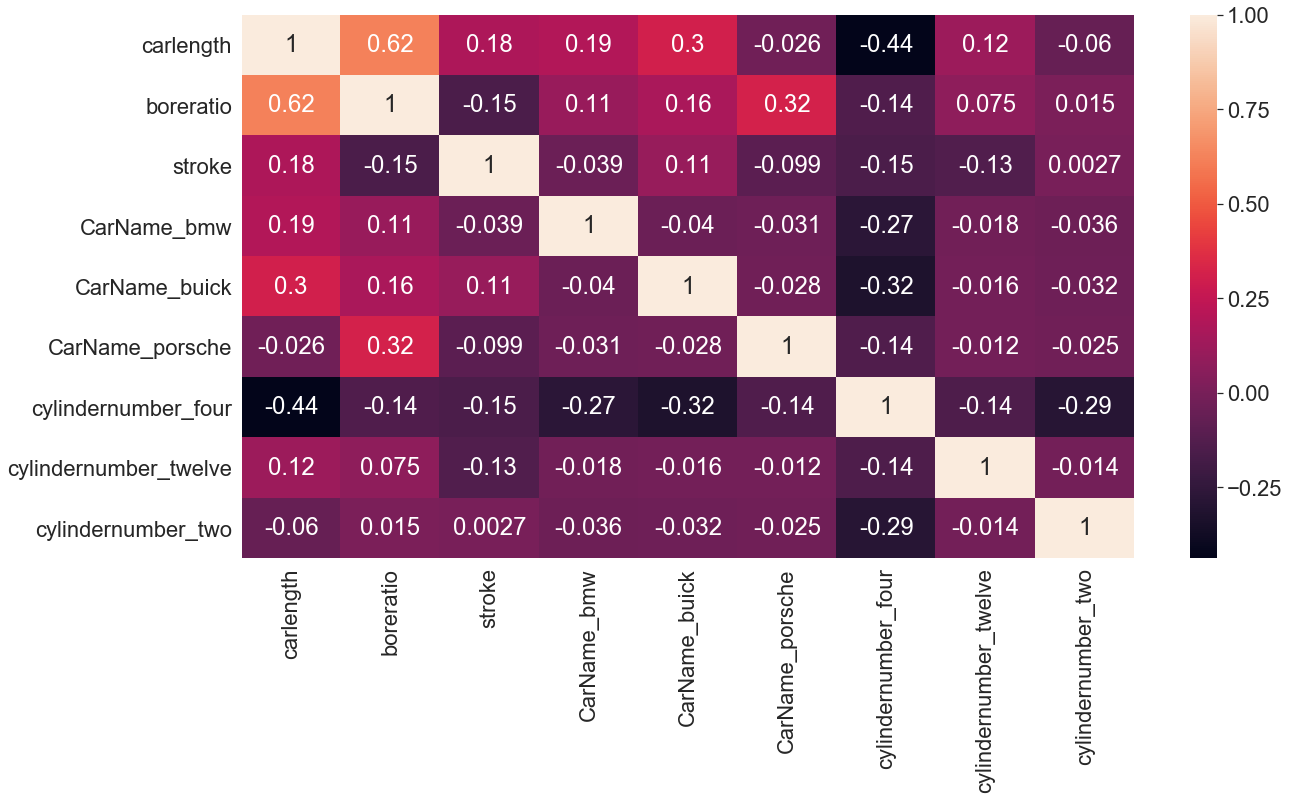

In [166]:
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

cylindernumber_two also having high p-value, Lets drop this variance as well

<b>Model-8</b>

In [167]:
# Dropping highly correlated variables and insignificant variables
X_train8 = X_train7.drop('cylindernumber_two', 1)
# Creating a eighth fitted model
lm_8 = sm.OLS(y_train,X_train8).fit()

#Let's see the summary of our eighth linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     97.88
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.72e-52
Time:                        22:28:05   Log-Likelihood:                 169.76
No. Observations:                 143   AIC:                            -321.5
Df Residuals:                     134   BIC:                            -294.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [168]:
df.drop('cylindernumber_two', axis =1, inplace = True)
getVIF(df)

Features   VIF
0              carlength  2.38
1              boreratio  2.23
2                 stroke  1.22
5        CarName_porsche  1.21
4          CarName_buick  1.11
6    cylindernumber_four  1.10
3            CarName_bmw  1.06
7  cylindernumber_twelve  1.05

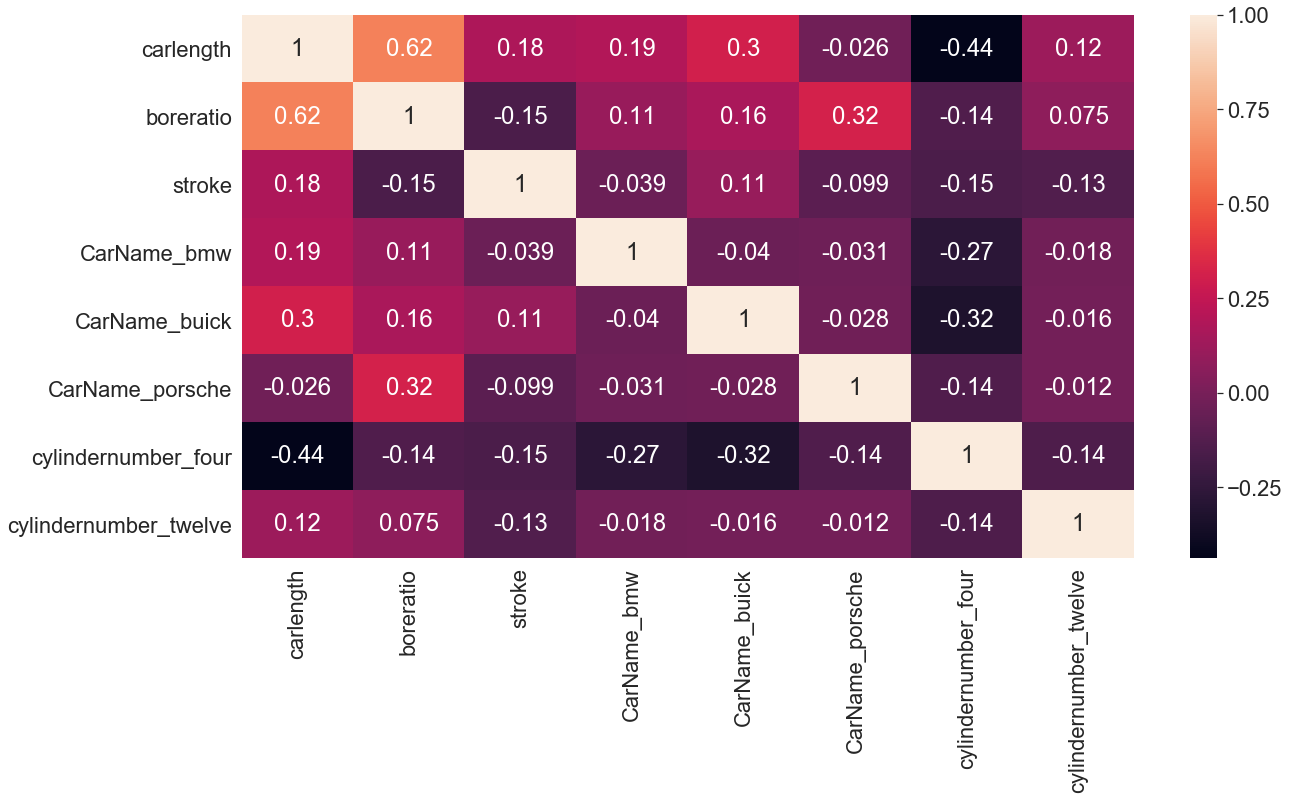

In [169]:
#Corelation Matrix
plt.figure(figsize = (20,10))  
sns.heatmap(df.corr(),annot = True)

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [170]:
y_train_price = lm_8.predict(X_train8)

Text(0.5, 0, 'Errors')

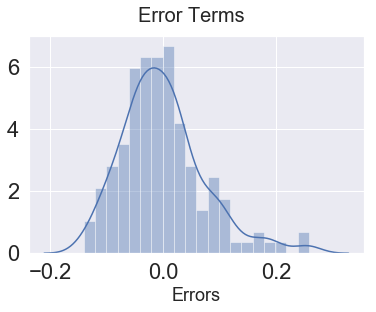

In [171]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

Although not the perfect normal distribution and centered not perfectly but almost around zero. 
Still model is not explain some variance as we can see some of variance are in tail, considering the size of the train and test data this error term distribution still is almost close to a normal distribution.

# Making Predictions

Lets test our model on test set

In [172]:
# Adding  constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)

In [173]:
# Creating X_test_m8 dataframe by dropping variables from X_test_m8
X_test_m8 = X_test_m8.drop(col, axis=1)
X_test_m8 = X_test_m8.drop(['CarName_audi','cylindernumber_two','cylindernumber_three',
                            'enginetype_rotor','enginetype_dohcv','cylindernumber_eight','enginesize'], axis=1)
X_test_m8.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 9 columns):
const                    62 non-null float64
carlength                62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
CarName_bmw              62 non-null uint8
CarName_buick            62 non-null uint8
CarName_porsche          62 non-null uint8
cylindernumber_four      62 non-null uint8
cylindernumber_twelve    62 non-null uint8
dtypes: float64(4), uint8(5)
memory usage: 2.7 KB


In [174]:
# Making predictions
y_pred_m8 = lm_8.predict(X_test_m8)
y_pred_m8

160   -0.131808
186   -0.080689
59    -0.028522
165   -0.110925
140   -0.161068
64    -0.028522
198    0.039482
75    -0.002716
172   -0.007920
104    0.070542
200    0.055300
136    0.014937
111   -0.044562
41    -0.053972
73     0.539471
31    -0.254322
156   -0.131808
133    0.014937
65    -0.020709
83    -0.005782
195    0.055300
197    0.055300
126    0.407164
118   -0.190378
167   -0.007920
101    0.130025
124   -0.005782
69     0.423505
11     0.158175
46    -0.062165
         ...   
110    0.123925
201    0.055300
115    0.014677
174   -0.054652
134   -0.143166
169   -0.007920
92    -0.125768
173   -0.039442
74     0.491344
3     -0.054192
157   -0.131808
81    -0.054286
32    -0.245263
99    -0.053508
26    -0.190378
88    -0.075326
184   -0.098484
187   -0.098484
52    -0.179451
168   -0.007920
164   -0.118830
188   -0.080689
7      0.173482
158   -0.104942
123   -0.045634
28    -0.046623
29    -0.002424
182   -0.098484
40    -0.053972
128    0.407164
Length: 62, dtype: float

# Model Evaluation

Text(0, 0.5, 'Car Price')

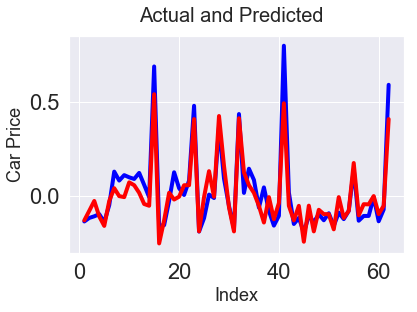

In [175]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=4, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m8, color="red",  linewidth=4, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=18)  

In [176]:
# Utility  method for generating straiget Line
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [177]:
X = y_test
Y = y_pred_m8
a, b = best_fit(X, Y)

best fit line:
y = -0.01 + 0.77x


Text(0, 0.5, 'y_pred')

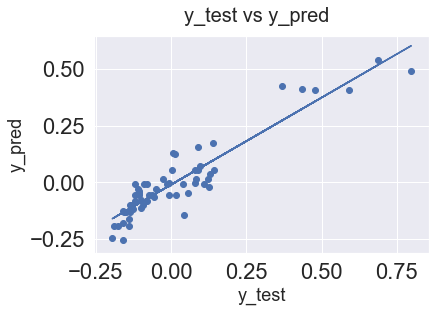

In [178]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m8)

yfit = [a + b * xi for xi in X]
plt.plot(X, yfit)

# Plot heading 
fig.suptitle('y_test vs y_pred', fontsize=20)    
# X-label
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18) 

y_test vs. y_pred is observed to be almost linear with some variataion occuring.But, it is a pretty linear.

Assessing the Model:
Lets scatter plot the error and see if the error is some random noise or white noise, or it has some pattern.

Text(0, 0.5, 'ytest-ypred')

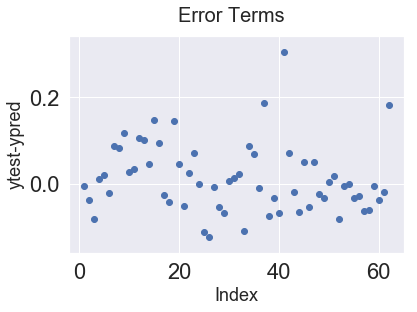

In [179]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred_m8)
# Plot heading 
fig.suptitle('Error Terms', fontsize=20)        
# X-label
plt.xlabel('Index', fontsize=18)  
# Y-label
plt.ylabel('ytest-ypred', fontsize=18)

Text(0, 0.5, 'Index')

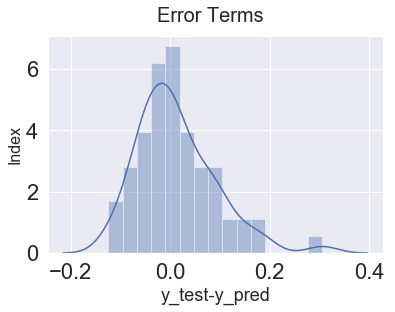

In [180]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m8),bins=15)
# Plot heading 
fig.suptitle('Error Terms', fontsize=20)   
# X-label
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=16)  

As we can see in the above scatter plot the error is randomly distributed and it does not follow any pattern. 

In [181]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred_m8))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_m8)
print('Model r2_score:',r2)

Model RMSE: 0.08025067328373336
Model r2_score: 0.8507752373561253


I think we are good to go with this model, which has both adjusted R square and R square close to 0.85

<i>r2_score</i> on the test data is very close to the trained Adj. R-Squared value of the model. we have a significantly high r2_score and a low RMSE of 0.080.

# Conclusions

<b>Model-8</b> pridicts car price with sufficient accurecy, contains only highly significant and <b>has litle or no multicollinearity</b>.<br>
Key variables used for car price prediction:

<li> <b>Luxury car brand - bmw, buick and porsche have significantly higher prices than other cars</b></li>
<li> <b>Number of cylinders such as four and twelve, car featues like length, stroke and boreratio engine power are key engine parameters controlling price</b></li>


For the negatively dependent variables, increase in value will decrease price for cars

Depending on these variables the <b>Geely Auto manufacturers</b> can develop appropriate car models with reasonable pricing.

